In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/HousePrice/train.csv")
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
# Drop non-numeric and columns with many missing values
data = data.select_dtypes(include=[np.number]).dropna(axis=1)

# Drop rows where SalePrice is missing
data.dropna(subset=["SalePrice"], inplace=True)

# Separate features and target
X = data.drop(["Id", "SalePrice"], axis=1)
y = data["SalePrice"]

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, preds))
r2 = r2_score(y_val, preds)

In [ ]:
# Print metrics
print(f"Validation RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Save model and columns
joblib.dump(model, "model.pkl")
joblib.dump(X.columns.tolist(), "model_columns.pkl")

# Create output directory for plots
os.makedirs("output", exist_ok=True)

Validation RMSE: 28489.69
R² Score: 0.8942


In [ ]:
# Save model and columns
joblib.dump(model, "model.pkl")
joblib.dump(X.columns.tolist(), "model_columns.pkl")

# Create output directory for plots
os.makedirs("output", exist_ok=True)

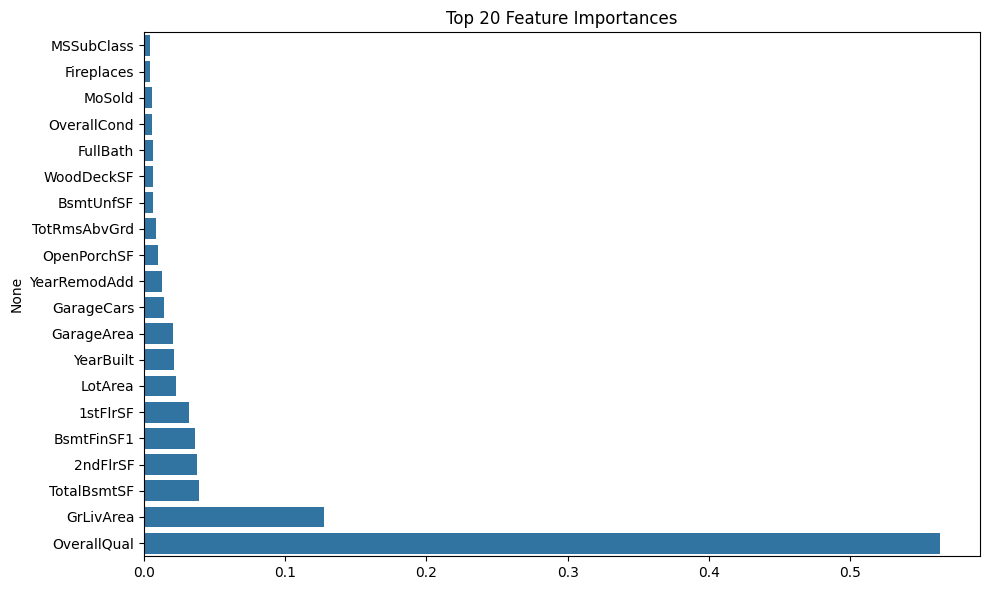

In [ ]:
# Plot: Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Top 20 Feature Importances")
plt.tight_layout()
# plt.savefig("output/feature_importance.png")
plt.show()

# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=preds, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.tight_layout()
# plt.savefig("output/actual_vs_predicted.png")
plt.show()